# Categorical Support Vector Classifier

## Imports

In [30]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [32]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 1.7 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.2 MB/s  0:00:00


In [33]:
import pandas as pd #for reading the data
from sklearn.preprocessing import MinMaxScaler #for data standardization
from sklearn.model_selection import train_test_split #to split the data into train and test parts
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder #to encode the data to numerical
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report, cohen_kappa_score, matthews_corrcoef, log_loss, \
ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV #for cross validation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# A function that would plot for us the decision regions of a problem
from mlxtend.plotting import plot_decision_regions

# This library will be used to measure the difference in times between the start and the end of a process
import time
import numpy as np

## Loading the database

#### Read the csv file and study the database

In [34]:
mushroom_data = pd.read_csv("mushrooms-full-dataset.csv", dtype = str)
mushroom_data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [35]:
mushroom_data['poisonous'].value_counts()

poisonous
e    4208
p    3916
Name: count, dtype: int64

In [8]:
mushroom_data.isnull().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Preprocessing

#### Define the target and the inputs

In [10]:
target = mushroom_data['poisonous']
inputs = mushroom_data.drop(['poisonous'], axis= 1)

#### Create a training and a testing dataset

In [11]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size= 0.2, random_state=42, stratify=target)

#### Check the result from the stratification

In [36]:
#check the result of the stratification
pd.Series(y_train).value_counts(normalize = True)

poisonous
e    0.517926
p    0.482074
Name: proportion, dtype: float64

In [37]:
y_train.value_counts()

poisonous
e    3366
p    3133
Name: count, dtype: int64

In [38]:
y_test.value_counts()

poisonous
e    842
p    783
Name: count, dtype: int64

#### Define a separate encoder for the target and the inputs 

In [39]:
enc_i = OrdinalEncoder()
enc_t = LabelEncoder()

#### Apply the fit_transform() method on the training data and the transform() method on the test data.

In [40]:
x_train_transf = enc_i.fit_transform(x_train)
x_test_transf = enc_i.fit_transform(x_test)

y_train_transf = enc_t.fit_transform(y_train)
y_test_transf = enc_t.fit_transform(y_test)


In [41]:
x_train_transf

array([[2., 3., 9., ..., 1., 5., 1.],
       [5., 2., 5., ..., 7., 1., 6.],
       [0., 2., 3., ..., 7., 3., 1.],
       ...,
       [2., 0., 8., ..., 2., 0., 1.],
       [5., 0., 3., ..., 3., 5., 0.],
       [2., 0., 4., ..., 3., 4., 0.]], shape=(6499, 21))

In [42]:
y_train_transf

array([1, 0, 0, ..., 0, 0, 0], shape=(6499,))

## Rescaling

### In order for the SVC to work correctly the inputs need to be rescaled to the range (-1, 1)

In [43]:
scaling = MinMaxScaler(feature_range= (-1,1)).fit(x_train_transf)
x_train_rescaled = scaling.transform(x_train_transf)

## Classification

In [44]:
c = 1.0
svc = svm.SVC(kernel='linear', C=c).fit(x_train_rescaled, y_train_transf)

In [23]:
y_pred_test = svc.predict(scaling.transform(x_test_transf))

## Evaluation

#### Evaluate the model on the test data

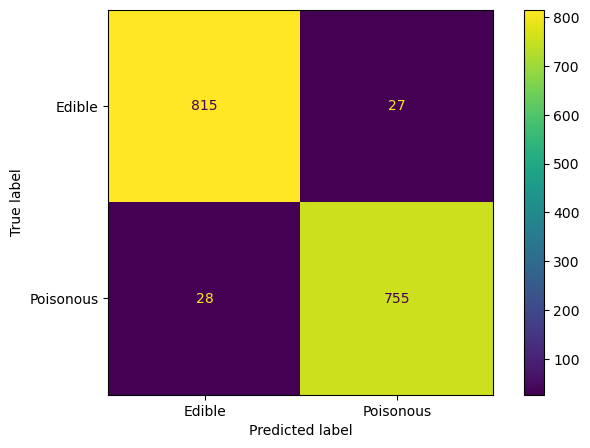

In [27]:
fig, ax = plt.subplots(figsize = (8, 5))

cmap = ConfusionMatrixDisplay(
    confusion_matrix(y_test_transf, y_pred_test),
    display_labels=['Edible', 'Poisonous'],
)

cmap.plot(ax=ax)

In [28]:
print(classification_report(y_test_transf,y_pred_test, target_names=['Edible', 'Poisonous']))

              precision    recall  f1-score   support

      Edible       0.97      0.97      0.97       842
   Poisonous       0.97      0.96      0.96       783

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



## Hyperparameter Tuning with GridSearchCV

### Choose the best kernel and optimal C parameter based on Cross Validation of the training data

In [51]:
tuned_parameters = [
    {'kernel': ['linear'], 'C': [1, 10]},
    {'kernel': ["poly"], 'C': [1,10]},
    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1,10]}
]

In [52]:
scores = ['precision', 'recall']

In [53]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring='%s_macro' % score)
    clf.fit(x_train_rescaled, y_train_transf)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true, y_pred = y_test_transf, clf.predict(scaling.transform(x_test_transf))
    print(classification_report(y_true, y_pred))
    print()
        
    

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'poly'}

Grid scores on development set:

0.951 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.959 (+/-0.008) for {'C': 10, 'kernel': 'linear'}
1.000 (+/-0.001) for {'C': 1, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 10, 'kernel': 'poly'}
0.926 (+/-0.010) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.895 (+/-0.011) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.947 (+/-0.007) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.926 (+/-0.010) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


# Tuning hyper-parameters for reca

In [54]:
c = 10.0
svc = svm.SVC(kernel='poly', C=c).fit(x_train_rescaled, y_train_transf)

In [55]:
y_pred_test = svc.predict(scaling.transform(x_test_transf))

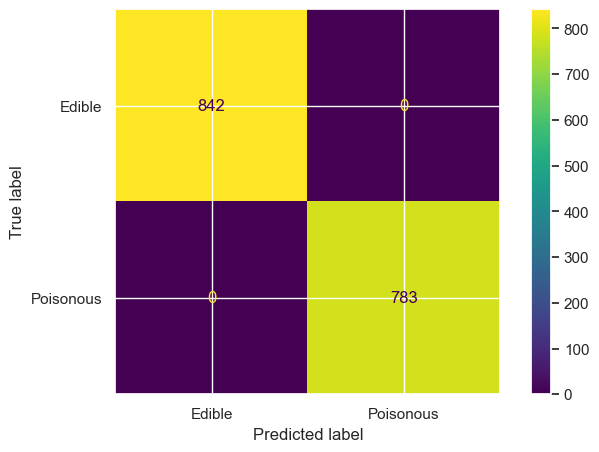

In [56]:
fig, ax = plt.subplots(figsize = (8, 5))

cmap = ConfusionMatrixDisplay(
    confusion_matrix(y_test_transf, y_pred_test),
    display_labels=['Edible', 'Poisonous'],
)

cmap.plot(ax=ax)

In [57]:
print(classification_report(y_test_transf,y_pred_test, target_names=['Edible', 'Poisonous']))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       842
   Poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

